# SIER for peak prediction

In [13]:
"""

The SEIR model that characterizes the epidemic COVID-19 outbreaks is described as follows [20,21]:
dS(t)/d(t) = (beta)*S(t)I(t),
dE(t)/d(t) = S(t)I(t) 􀀀 E(t),
dI(t)/d(t) = E(t) 􀀀 
I(t) 􀀀 MI(t),
dR(t)/d(t) = 
I(t),
dD(t)/d(t) = MI(t)

"""

'\n\nThe SEIR model that characterizes the epidemic COVID-19 outbreaks is described as follows [20,21]:\ndS(t)/d(t) = (beta)*S(t)I(t),\ndE(t)/d(t) = \x0cS(t)I(t) \U00100000 \x0bE(t),\ndI(t)/d(t) = \x0bE(t) \U00100000 \nI(t) \U00100000 MI(t),\ndR(t)/d(t) = \nI(t),\ndD(t)/d(t) = MI(t)\n\n'

S = number of succeptible

E = number of exposed

I = infective 

R = recovered

<b>beta</b> = infection, <b>alfa</b> = onset, </b>gamma</b> = removal, <b>M = mortality rate</b>

S + E + I + R + D = 1

X = number of cases at time t

<b>Assumption</b> at t=0, there exist only one case

N = country population

formula is: X(0) =  pNI(0) = 1

X(t) = pNI(t)

X = number of infected cases at time t,
p = identification rate;         I(0) = 1/(p*N).

It is assumed that there are no exposed, recovered, and death cases at t = 0, and hence,
S(0) = 1 - (E(0) + I(0) + R(0) + D(0)) = 1/pN

Eigen Value R0

R0 = next_eigen(G) :  where; G = FV^-1

F = some matrix shown in paper ; V = some matrix shown in paper

R0 = beta/gamma

Coefficient Description Value

In [14]:
alfa = 0.2  # Onset Rate
gamma = 0.1 # Removal Rate
M = 12605/381485   # Mortality Rate (should be different for India)
N = 1350000000   # Population of the country (change it for India)
p = 0.084   # Identification Rate

## beta Estimation Using GA

assume X(t) is subjected to the Poisson
noise, which reflects the fluctuations of the number of infected cases

X(t)_hat = X(t) + epsilon*X(t)^epsilon, Poisson noise = epsilon*X(t)^epsilon

epsilon is a random variable from a normal distribution. N(0,1)
epsilon is initialized to 0.5

minimizing the cost function C:

C  = summation([(X(t)-X(t)_hat)]^2) from t = 0 to t = t0.


upper bound of beta = 0.4 and lower bound is 0.2

GA algo is now implemented to find optimum beta by minimizing the cost!

solving SIR model

R0 = 3.89


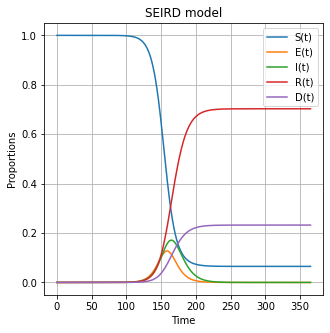

In [15]:
import numpy as np
import scipy.integrate 
import matplotlib.pyplot as plt
import pygad


def SIRD_model(y, t, alfa, beta, gamma, M):
    S,E, I, R, D = y
    
    dS_dt = -beta*S*I
    dE_dt = beta*S*I - alfa*E
    dI_dt = alfa*E - gamma*I - M*I
    dR_dt = gamma*I
    dD_dt = M*I
    
    return ([dS_dt,dE_dt, dI_dt, dR_dt, dD_dt])


# t1 = np.linspace(0, 99,100)
t1 = np.linspace(0, 365,365)
t = []
for i in t1:
    i = int(i)
    t.append(i)


S0 = 1-1/(p*N)
E0 = 0.0
I0 = 1/(p*N)
R0 = 0.0
D0 = 0.0

# Initial Condition
beta = 0.389

Ro = beta/(gamma)
print('R0 =',Ro)
solution = scipy.integrate.odeint(SIRD_model, [S0, E0,I0, R0, D0], t, args=(alfa,beta, gamma, M))



plt.figure(figsize=[5,5])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="E(t)")
plt.plot(t, solution[:, 2], label="I(t)")
plt.plot(t, solution[:, 3], label="R(t)")
plt.plot(t, solution[:, 4], label="D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SEIRD model")
plt.show()

X(t) = pNI(t)

X = number of infected cases at time t, p = identification rate; I(0) = 1/(p*N).

It is assumed that there are no exposed, recovered, and death cases at t = 0, and hence, S(0) = 1 - (E(0) + I(0) + R(0) + D(0)) = 1/pN

In [16]:
I = solution[:,2]
X_hat = p*N*I

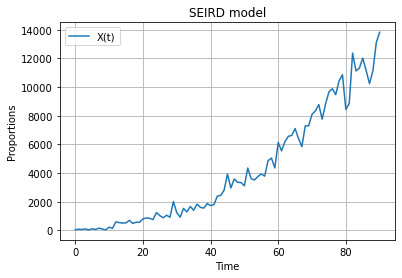

In [17]:
import pandas as pd
train  = pd.read_csv("../input/covidindia/Daily_Infections.csv")

train.shape[0]
timestep = []
for i in range(train.shape[0]):
    timestep.append(i)
    
X  = train['daily new infections']

plt.plot(t[:len(X)], X, label="X(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SEIRD model")
plt.show()
# len(solution)

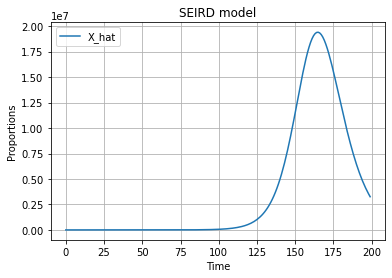

In [18]:
plt.plot(t[:200], X_hat[:200], label="X_hat")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SEIRD model")
plt.show()
# len(solution)

# Using SCIPY to optmize for beta

In [19]:
from scipy import optimize
def f(x):
    return -np.exp(-(x - 0.7)**2)

X = np.array(X)

know_params = [S0,E0,I0,R0,D0]
# beta = 13
beta1 = np.array([alfa,beta,gamma,M])

def cost_func(beta):
    cost = 0
    # Initial Condition
    Ro = beta/gamma
#     print('R0 =',Ro)
    solution = scipy.integrate.odeint(SIRD_model, [S0, E0,I0, R0, D0], t, args=(alfa,beta,gamma,M))
    I = solution[:,2]
    X_hat = p*N*I
    for i in range(len(X)):
        cost+=(X[i]-X_hat[i])**2
    cost = cost/(2*len(X))
    return cost
# cost_func(beta,id)

result = optimize.minimize_scalar(cost_func)
result # check if solver was successful

     fun: 5496082.875730708
    nfev: 21
     nit: 17
 success: True
       x: 0.3896163001902931

# Implementation of Genetic Algorithm

In [ ]:
X = np.array(X)

know_params = [S0,E0,I0,R0,D0]
# beta = 13
beta1 = np.array([alfa,beta,gamma,M])

def cost_func(beta,id):
    cost = 0
    # Initial Condition
    Ro = beta/gamma
#     print('R0 =',Ro)
    solution = scipy.integrate.odeint(SIRD_model, [S0, E0,I0, R0, D0], t, args=(alfa,beta,gamma,M))
    I = solution[:,2]
    X_hat = p*N*I
    for i in range(len(X)):
        cost+=(X[i]-X_hat[i])**2
    cost = cost/(2*len(X))
    return -1*cost
cost_func(beta,id)
import pygad
import numpy

fitness_function = cost_func

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = 1 #len(function_inputs)

init_range_low = 0.2
init_range_high = 0.4

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 10 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "uniform" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=cost_func,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=0,
                       init_range_high=1,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# prediction = numpy.sum(numpy.array(function_inputs)*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()

Generation = 1
Fitness    = -6783668.491360485
Generation = 2
Fitness    = -6783668.491360485
Generation = 3
Fitness    = -6555119.106870738
Generation = 4
Fitness    = -5570482.240610276
Generation = 5
Fitness    = -5570482.240610276
Generation = 6
Fitness    = -5570482.240610276
Generation = 7
Fitness    = -5570482.240610276
Generation = 8
Fitness    = -5570482.240610276
Generation = 9
Fitness    = -5570482.240610276
Generation = 10
Fitness    = -5570482.240610276
Generation = 11
Fitness    = -5542604.516938591
Generation = 12
Fitness    = -5542604.516938591
Generation = 13
Fitness    = -5542604.516938591
Generation = 14
Fitness    = -5542604.516938591
Generation = 15
Fitness    = -5542604.516938591
Generation = 16
Fitness    = -5542604.516938591
Generation = 17
Fitness    = -5542604.516938591
Generation = 18
Fitness    = -5542604.516938591
Generation = 19
Fitness    = -5521777.190996791
Generation = 20
Fitness    = -5521777.190996791
Generation = 21
Fitness    = -5521777.190996791
G